# Netflix Movies and TV Shows Analysis / Data Visualization

## Importing relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

## Loading in Dataset

[Dataset Source](https://www.kaggle.com/datasets/shivamb/netflix-shows)

In [4]:
df = pd.read_csv('netflix_titles 2.csv')

## Getting some basic insights of the dataset

* head()
* info()
* shape
* describe()

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.shape

(8807, 12)

In [15]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Working on some Data Cleaning

* identify nan and deal with them

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
df['director'].replace(np.nan, 'No Data',inplace  = True)
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['country'].replace(np.nan, 'No Data',inplace  = True)
df['date_added'].replace(np.nan, 'No Data',inplace  = True)
df['rating'].replace(np.nan, 'No Data',inplace  = True)
df['duration'].replace(np.nan, 'No Data',inplace  = True)

In [122]:
count_by_production_type = df.groupby('type')

prod_type = pd.DataFrame(count_by_production_type['type'].count())

In [131]:
prod_type.head()

,type
type,
Movie,6131
TV Show,2676


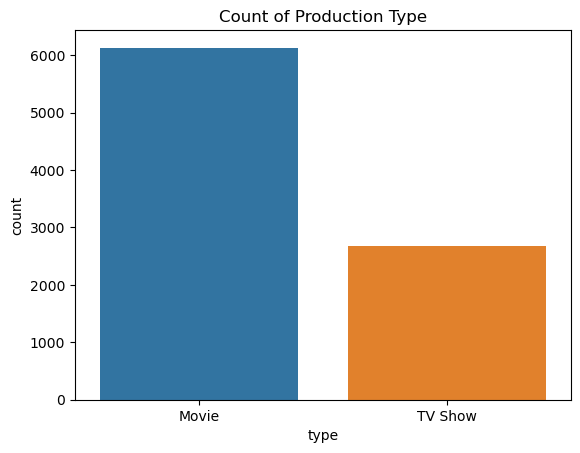

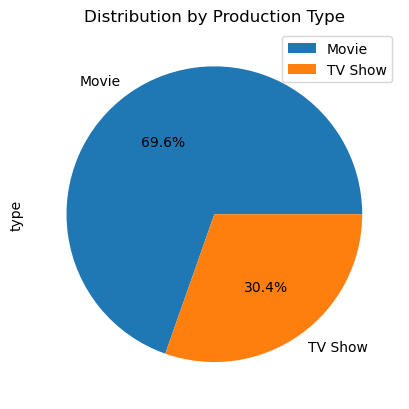

In [239]:
sns.countplot(x='type', data=df).set(title='Count of Production Type')
prod_type.plot(kind='pie', y="type", autopct='%1.1f%%', title='Distribution by Production Type')

plt.show()

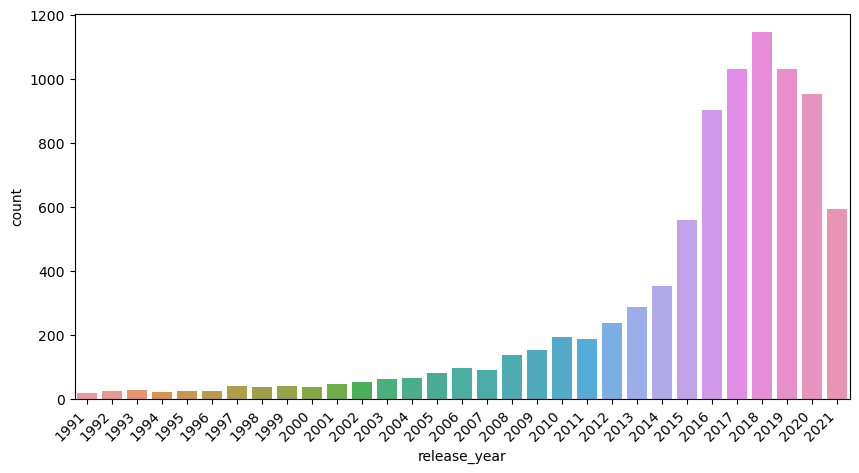

In [273]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='release_year', data=df[df['release_year']> 1990])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');